In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("coba_bersihkan3.csv", header=0, quotechar='"', encoding="utf-8")

In [6]:
print(df['cleaned_text'].isnull().sum())
df.isnull().sum()

0


url              0
title            0
description      0
keywords         0
label            0
combined_text    0
cleaned_text     0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.head()

,url,title,description,keywords,label,combined_text,cleaned_text
0,mainlagi247.org,igamble247com live casino online agen casino c...,igamble247 promotor casino online terbaik bet ...,casino online casino live casino agen casino l...,1,igamble247com live casino online agen casino c...,igamble247com live casino online agen casino c...
1,mainlahbro.com,plaza4d situs slot depo dana klaim promo bonus...,plaza 4d situs slot online bonus terbesar agen...,agen togel togel online bandar togel togel res...,1,plaza4d situs slot depo dana klaim promo bonus...,plaza4d situs slot depo dana klaim promo bonus...
2,mainlahkuy.pro,as7000 situs slot raja zeus gampang maxwin,as7000 situs slot zeus mudah maxwin winrate te...,as7000,1,as7000 situs slot raja zeus gampang maxwin as7...,as7000 situs slot raja zeus gampang maxwin as7...
3,mainlahkuy.xyz,as7000 situs slot gacor berlisensi,as7000 situs game online slot deposit 5k gacor...,as7000 as 7000 as7000 rtp as7000 login as7000 ...,1,as7000 situs slot gacor berlisensi as7000 situ...,as7000 situs slot gacor berlisensi as7000 situ...
4,mainlahwe.com,fyp805 event special scatter hitam 2024,fyp805 salah situs permainan game online terbe...,fyp805,1,fyp805 event special scatter hitam 2024 fyp805...,fyp805 event special scatter hitam 2024 fyp805...


In [22]:
# Tokenisasi
tokenized_sentences = df['cleaned_text'].apply(lambda x: x.split()).tolist()

print("Contoh tokenized sentences:")
print(tokenized_sentences[:5])  # 5 baris pertama

Contoh tokenized sentences:
[['igamble247com', 'live', 'casino', 'online', 'agen', 'casino', 'casino', 'online', 'igamble247', 'promotor', 'casino', 'online', 'terbaik', 'bet', 'terkecil', 'live', 'dealer', 'terpercaya', 'fair', 'salah', 'terbesar', 'asia', 'bergabunglah', 'casino', 'online', 'casino', 'live', 'casino', 'agen', 'casino', 'live', 'casino', 'online', 'igamble247'], ['plaza4d', 'situs', 'slot', 'depo', 'dana', 'klaim', 'promo', 'bonus', 'terbesar', 'plaza', '4d', 'situs', 'slot', 'online', 'bonus', 'terbesar', 'agen', 'togel', 'terpercaya', 'menerima', 'depo', 'via', 'ewallet', 'anti', 'ribet', 'daftar', 'raih', 'max', 'win', 'plaza4d', 'agen', 'togel', 'togel', 'online', 'bandar', 'togel', 'togel', 'resmi', 'situs', 'togel', 'bandar', 'judi', 'online', 'agen', 'casino', 'terpercaya', 'bandar', 'judi', 'bandar', 'togel', 'online', 'slot', 'online', 'casino', 'online', 'judi', 'bola'], ['as7000', 'situs', 'slot', 'raja', 'zeus', 'gampang', 'maxwin', 'as7000', 'situs', 'slo

In [10]:
from gensim.models import Word2Vec

# Latih Word2Vec
w2v_model = Word2Vec(
    sentences=tokenized_sentences,  # Data tokenized sentences
    vector_size=100,               # Dimensi embedding
    window=5,                      # Window size (konteks kata)
    min_count=5,                   # Kata dengan frekuensi rendah akan diabaikan
    workers=4,                     # Jumlah thread
    sg=1                           # Gunakan Skip-Gram (0 untuk CBOW)
)

# Simpan model Word2Vec
w2v_model.save("word2vec_model.model")

print("Word2Vec model berhasil dibuat!")

Word2Vec model berhasil dibuat!


In [11]:
print("Kata yang mirip dengan 'judi':")
print(w2v_model.wv.most_similar("judi", topn=100))

Kata yang mirip dengan 'judi':
[('multibet88', 0.7392002940177917), ('online', 0.7204141616821289), ('online24jam', 0.7120330929756165), ('terpercayabandar', 0.7020962238311768), ('onlinejudi', 0.699447751045227), ('rolet', 0.6962600350379944), ('gacorbos88', 0.6960397362709045), ('citibet88', 0.6935504078865051), ('terpercaya', 0.6918578147888184), ('terpercayajudi', 0.6908981800079346), ('onlinesitus', 0.689910352230072), ('onlineagen', 0.6875737309455872), ('terpercayasitus', 0.6872383952140808), ('situs', 0.6813915967941284), ('ib', 0.6781122088432312), ('panen123jp', 0.676302969455719), ('maha168', 0.6759714484214783), ('nenektogel4d', 0.6755889058113098), ('pandora188', 0.6755110621452332), ('bola365', 0.6707205176353455), ('slotjudi', 0.6706294417381287), ('bola168', 0.6704427003860474), ('texas88', 0.668793797492981), ('mansion77', 0.6668182015419006), ('terpercayagame', 0.6655871272087097), ('osg888', 0.6655538082122803), ('amanbet88', 0.6648163199424744), ('terkemukan', 0.664

In [23]:
print("Embedding untuk kata 'judi':")
print(w2v_model.wv['judi'])

Embedding untuk kata 'judi':
[-0.29200915 -0.1357297   0.33601442 -0.22401641 -0.5778238   0.05668046
  0.08449837  1.0928544  -0.31765547 -0.31500104  0.19308046 -0.17155683
 -0.26249838 -0.13884321  0.24163814  0.44751605 -0.20808744 -0.04232679
  0.10562806 -0.71118003 -0.15316576 -0.25636196  0.658041   -0.19824432
 -0.04794269  0.05092157  0.26369852  0.61821824  0.42518833  0.28494948
  1.0292648  -0.4309347  -0.09267516 -0.27909955  0.01257687  0.20938194
  0.8862434   0.3422756   0.28585717 -0.627605    0.7580459   0.06789346
 -0.4410684   0.0757625  -0.26916918  0.04482067 -0.14340822 -0.00255689
  0.33396876 -0.06978824 -0.49312225 -0.26749635 -0.19593976  0.66919094
 -0.04771278  0.43428233  0.29000968  0.15041824  0.5462087  -0.27830133
  0.11525825  0.37361172  0.21328087 -0.3096387  -0.40828517  0.5283599
  0.14329436  0.17727976 -0.19357017  0.34077343  0.04196771 -0.01276278
  0.01656139  0.02337921  0.7924374   0.14204778  0.23613624  0.47203246
 -0.07226129  0.2001041

In [24]:
# Simpan embedding dalam format teks
w2v_model.wv.save_word2vec_format('word2vec_embeddings.txt', binary=False)

In [25]:
import numpy as np

# Vocabulary Word2Vec
vocab_size = len(w2v_model.wv)
embedding_dim = 100  # Dimensi embedding Word2Vec

# Buat embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
word_index = {word: i for i, word in enumerate(w2v_model.wv.index_to_key)}

for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]

NEXT ================================================>>>>>>>>>>>>>>>>>>>>>>>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [27]:
X = df['cleaned_text']  # menggunakan cleaned_text sebagai fitur
y = df['label']        # menggunakan kolom label

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% untuk testing
    random_state=42,    # untuk reproducibility
    stratify=y         # untuk memastikan distribusi kelas seimbang
)

In [28]:
tokenizer = Tokenizer(num_words=10000)  # membatasi vocabulary size
tokenizer.fit_on_texts(X_train)

In [29]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [30]:
maxlen = 100  # panjang maksimum sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

RETURNNNN

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
maxlen = 100  # panjang maksimum sequence
tokenizer = Tokenizer(num_words=10000)  # membatasi vocabulary size
tokenizer.fit_on_texts(df['cleaned_text'])

In [35]:
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=maxlen)
y = df['label'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [37]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [38]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 3.72625, 1: 0.5774893452150329}


In [40]:
model = Sequential([
    # Embedding layer dengan pre-trained Word2Vec weights
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False  # Freeze embedding layer
    ),
    
    # BiLSTM layers
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    
    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

d:\home_fanfan\bangkit\coursera\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Tampilkan summary model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,208,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,208,800 (16.06 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,208,800 (16.06 MB)

In [43]:
early_stopping = EarlyStopping(
    monitor='val_precision',  # Monitor precision
    patience=3,
    restore_best_weights=True,
    mode='max'
)

In [44]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Epoch 1/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - AUC: 0.9760 - Precision: 0.9915 - Recall: 0.9435 - accuracy: 0.9444 - loss: 0.2088 - val_AUC: 0.9934 - val_Precision: 0.9913 - val_Recall: 0.9808 - val_accuracy: 0.9762 - val_loss: 0.0763
Epoch 2/20


d:\home_fanfan\bangkit\coursera\myenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_precision` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


373/373 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - AUC: 0.9955 - Precision: 0.9965 - Recall: 0.9694 - accuracy: 0.9706 - loss: 0.0728 - val_AUC: 0.9940 - val_Precision: 0.9940 - val_Recall: 0.9793 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 3/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - AUC: 0.9962 - Precision: 0.9973 - Recall: 0.9782 - accuracy: 0.9787 - loss: 0.0602 - val_AUC: 0.9946 - val_Precision: 0.9960 - val_Recall: 0.9789 - val_accuracy: 0.9785 - val_loss: 0.0681
Epoch 4/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - AUC: 0.9966 - Precision: 0.9986 - Recall: 0.9835 - accuracy: 0.9845 - loss: 0.0498 - val_AUC: 0.9958 - val_Precision: 0.9976 - val_Recall: 0.9851 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 5/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 46s 125ms/step - AUC: 0.9988 - Precision: 0.9989 - Recall: 0.9869 - accuracy: 0.9877 - loss: 0.0314 - val_AUC: 0.9955 - val_Precision: 0.9988 - val_Recall: 0.9824 - val_accuracy: 0.9839 - val_loss: 0.0538
Epoch 6/20
373/373 ━━━━━━━━━━━━

In [45]:
# Prediksi
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       500
           1       1.00      1.00      1.00      3227

    accuracy                           1.00      3727
   macro avg       0.99      0.99      0.99      3727
weighted avg       1.00      1.00      1.00      3727


Confusion Matrix:
[[ 495    5]
 [   9 3218]]


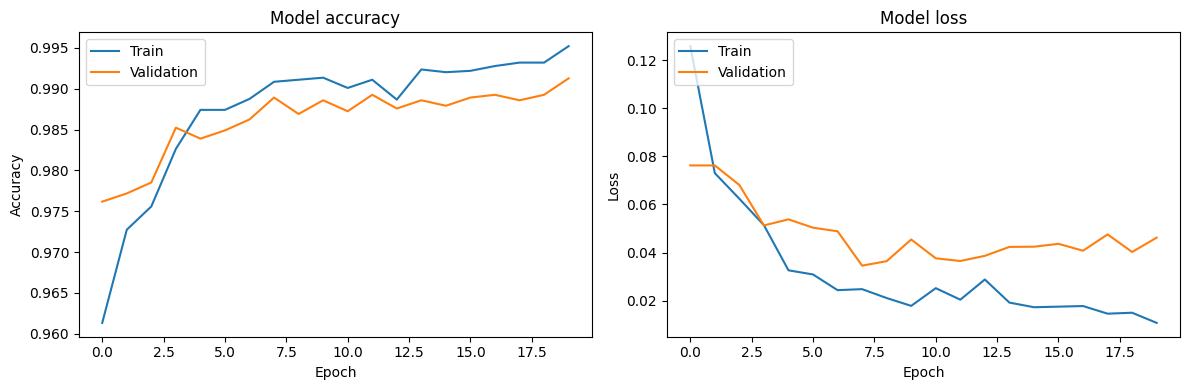

In [46]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [47]:
# Simpan model
model.save('gambling_detection_model.h5')

# Simpan tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

print("Model dan tokenizer berhasil disimpan!")

Model dan tokenizer berhasil disimpan!


In [ ]:
def predict_text(text):
    # Preprocessing
    # Gunakan preprocessing yang sama dengan data training
    
    # Tokenisasi dan padding
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=maxlen)
    
    # Prediksi
    prediction = model.predict(padded)[0][0]
    
    return {
        'text': text,
        'probability': float(prediction),
        'prediction': 'Judi Online' if prediction > 0.5 else 'Bukan Judi Online'
    }

# Contoh penggunaan
test_text = "kominfo melakukan pemblokiran website judi online" #hasilnya bukan
# test_text = "pemerintah indonesia melakukan pemblokiran terhadap 2000 website judi online" # hasilnya bukan
# test_test = "pemerintah berhasil indonesia melakukan pemblokiran terhadap 2 juta website judi online" #hasilnya bukan
# test_text = "website resmi di indonesia dijamin maxwin"
# test_text = "website resmi di indonesia dijamin menang"
# test_text = "website terpecaya di amin wd"
result = predict_text(test_text)
print("\nHasil Prediksi:")
print(f"Teks: {result['text']}")
print(f"Probabilitas: {result['probability']:.4f}")
print(f"Prediksi: {result['prediction']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

Hasil Prediksi:
Teks: kominfo melakukan pemblokiran website judi online
Probabilitas: 0.2055
Prediksi: Bukan Judi Online
